In [1]:
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [3]:
TRAIN_DATASET_PATH='data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'

In [4]:
test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_flair.nii').get_fdata()
print(test_image_flair.max())

1854.603271484375


In [5]:
test_image_flair.shape

(240, 240, 155)

### Rescale the loaded image

Scalers are applied to 1D so Let us reshape and then reshape back to original shape.

In [6]:
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)

In [7]:
print(test_image_flair.max())

1.0


In [8]:
test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1.nii').get_fdata()
test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1ce.nii').get_fdata()
test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t2.nii').get_fdata()
test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_seg.nii').get_fdata()
test_mask=test_mask.astype(np.uint8)

In [9]:
print(np.unique(test_mask))
test_mask[test_mask ==4] = 3
print(np.unique(test_mask))

[0 1 2 4]
[0 1 2 3]


In [10]:
import random
n_slice = random.randint(0, test_mask.shape[2])

plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

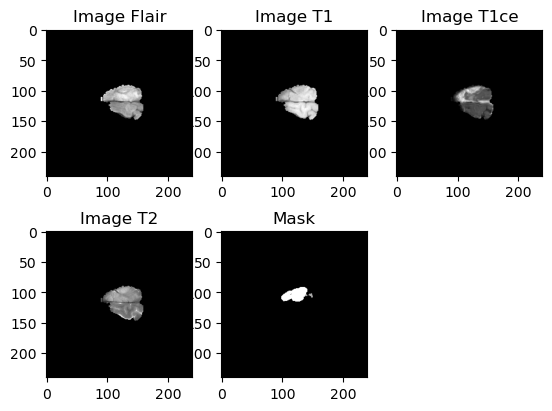

In [11]:
plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image Flair')

plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image T1')

plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image T1ce')

plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image T2')

plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image T2')

plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice], cmap='gray')
plt.title('Mask')
plt.show()

## Part 2 : Exploring the process of combining images to channels

### Combine t1ce, t2, and flare into single multichannel image

In [12]:
combined_x = np.stack([test_image_flair, test_image_t2, test_image_t1ce], axis=3)
print("Dimensions of the stacked images: ",combined_x.shape)

Dimensions of the stacked images:  (240, 240, 155, 3)


In [13]:
combined_x = combined_x[56:184, 56:184, 13:141] # Crop to 128x128 

In [17]:
print("Dimension of cropped image: ", combined_x.shape)

Dimension of cropped image:  (128, 128, 128, 3)


In [14]:
# Do the same for mask
test_mask = test_mask[56:184, 56:184, 13:141]

n_slice= random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

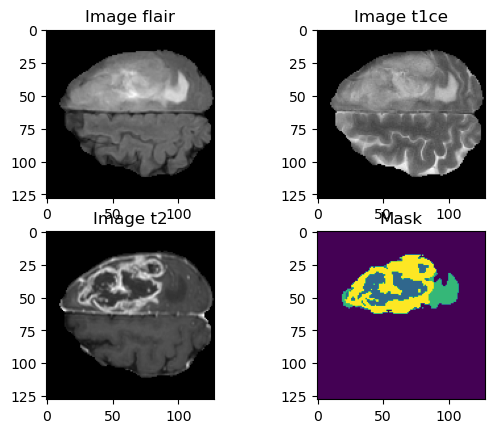

In [15]:
plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [16]:
imsave('data/BraTS2020_TrainingData/combined255.tif', combined_x)
np.save('data/BraTS2020_TrainingData/combined255.npy', combined_x)

C:\Windows\Temp\ipykernel_25876\4188789796.py:1: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave('data/BraTS2020_TrainingData/combined255.tif', combined_x)


In [36]:
# Loading save numpy array
my_img = np.load('data/BraTS2020_TrainingData/combined255.npy')

In [37]:
# Verifying if the saved image is same as combined_x

combined_x== my_img.all()

array([[[[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        ...,

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ T

In [38]:
test_mask = to_categorical(test_mask, num_classes=4)

### Apply the data loading techniques to the Training Folder

#### Merge channels, crop, patchify, save

In [43]:
t2_list = sorted(glob.glob('data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t2.nii')) # 369 files, 0 - 368
t1ce_list = sorted(glob.glob('data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1ce.nii'))
flair_list = sorted(glob.glob('data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*flair.nii'))
mask_list = sorted(glob.glob('data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*seg.nii'))

In [44]:
len(t2_list)


369

In [48]:
for img in range(len(t2_list)): # using t2 list as length of all the lists is the same
    print("Now preparing image and masks number: ", img)

    temp_image_t2=nib.load(t2_list[img]).get_fdata()
    temp_image_t2 = scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(test_image_t2.shape)

    temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce = scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

    temp_image_flair=nib.load(flair_list[img]).get_fdata()
    temp_image_flair = scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(test_image_flair.shape)

    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask = temp_mask.astype(np.uint8)
    temp_mask [temp_mask ==4] = 3 

    temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)

    #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches
    #Cropping x, y, z

    temp_combined_images = temp_combined_images[56:184, 56:184, 13:141]
    temp_mask = temp_mask[56:184, 56:184, 13:141]

    val, counts = np.unique(temp_mask, return_counts=True)

    if( 1 - (counts[0]/ counts.sum())) > 0.01:
        print("Save me")
        temp_mask = to_categorical(temp_mask, num_classes=4)
        np.save('data/BraTS2020_TrainingData/input_data_3channels/images/image_'+str(img)+'.npy', temp_combined_images)
        np.save('data/BraTS2020_TrainingData/input_data_3channels/masks/mask_'+str(img)+'npy', temp_mask)
    else:
        print('I am useless')

Now preparing image and masks number:  0
Save me
Now preparing image and masks number:  1
Save me
Now preparing image and masks number:  2
Save me
Now preparing image and masks number:  3
Save me
Now preparing image and masks number:  4
I am useless
Now preparing image and masks number:  5
Save me
Now preparing image and masks number:  6
Save me
Now preparing image and masks number:  7
Save me
Now preparing image and masks number:  8
Save me
Now preparing image and masks number:  9
Save me
Now preparing image and masks number:  10
Save me
Now preparing image and masks number:  11
Save me
Now preparing image and masks number:  12
Save me
Now preparing image and masks number:  13
Save me
Now preparing image and masks number:  14
Save me
Now preparing image and masks number:  15
Save me
Now preparing image and masks number:  16
Save me
Now preparing image and masks number:  17
Save me
Now preparing image and masks number:  18
Save me
Now preparing image and masks number:  19
Save me
Now p

In [50]:
import splitfolders

In [51]:
input_folder = 'data/BraTS2020_TrainingData/input_data_3channels/'
output_folder = 'data/BraTS2020_TrainingData/input_data_128/'

In [52]:
splitfolders.ratio(input=input_folder, output=output_folder, seed=42, ratio=(0.75, 0.25), group_prefix=None)

Copying files: 688 files [00:41, 16.43 files/s]


### Custom Data Generator

Loading Data from the local directory in batches.

In [53]:
import os
import numpy as np

In [70]:
def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)

In [71]:
def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):
    L = len(img_list)

    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)

            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield(X, Y) # a tuple with two numpy assrays with batch_size samples

            # using yield instead of return check documentation !!!!

            batch_start += batch_size
            batch_end += batch_size 


In [72]:
# Test the generator

from matplotlib import pyplot as plt
import random

train_img_dir = "data/BraTS2020_TrainingData/input_data_128/train/images/"
train_mask_dir = "data/BraTS2020_TrainingData/input_data_128/train/masks/"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

In [73]:
print("Number of images: ", len(train_img_list))
print("Number of image masks: ", len(train_mask_list))

Number of images:  258
Number of image masks:  258


In [74]:
batch_size =2

train_img_datagen = imageLoader(train_img_dir, train_img_list,
                                train_mask_dir, train_mask_list, batch_size)

In [75]:
#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()

In [79]:
print("Batch image size: ",img.shape)
print("Batch mask size: ",msk.shape)

Batch image size:  (2, 128, 128, 128, 3)
Batch mask size:  (2, 128, 128, 128, 4)


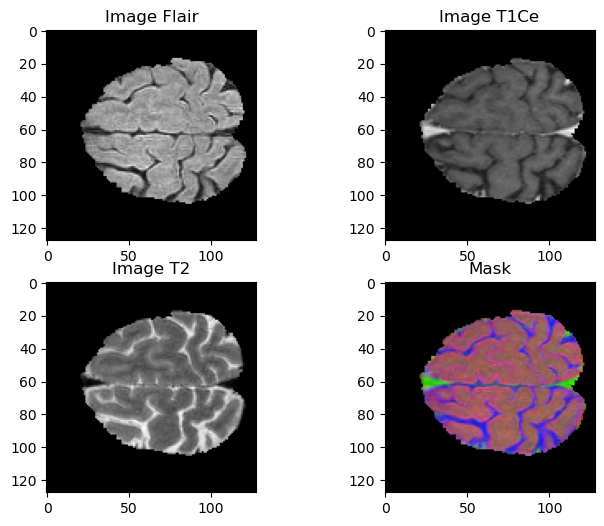

In [103]:
# Randomly selecting a slice from the images in the batch size

img_num = random.randint(0, img.shape[0]-1)
test_img = img[img_num]
test_mask = msk[img_num]
test_mask = np.argmax(test_mask, axis =3)

n_slice = random.randint(0, test_mask.shape[2])
plt.figure(figsize=(8,6))

plt.subplot(221)
plt.imshow(test_img[:,:, n_slice, 0], cmap='gray')
plt.title('Image Flair')

plt.subplot(222)
plt.imshow(test_img[:,:, n_slice, 1], cmap='gray')
plt.title('Image T1Ce')

plt.subplot(223)
plt.imshow(test_img[:,:, n_slice, 2], cmap='gray')
plt.title('Image T2')

plt.subplot(224)
plt.imshow(test_img[:,:, n_slice])
plt.title('Mask')
plt.show()

## Training & Prediciton Tumor Dataset (BraTS2020) Using 3D U-Net